In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Step 2: Will be sharing the dataset********************************************************
# Assuming your dataset is in a CSV file
data = pd.read_csv('combined_data.csv')

In [8]:
df=data.drop(['Recording timestamp','Computer timestamp','Sensor',], axis = 1)

In [9]:
# Step 3: Exploratory Data Analysis (EDA)
print(df.describe())
print(df['Eye movement type'].value_counts())

       Pupil diameter left  Pupil diameter right  Pupil diameter filtered  \
count          5230.000000           5230.000000              5230.000000   
mean              5.629625              5.583196                 5.607675   
std               0.388681              0.377715                 0.370451   
min               4.157000              3.973000                 4.618000   
25%               5.360000              5.356000                 5.362000   
50%               5.547000              5.478000                 5.485000   
75%               5.869750              5.925500                 5.944250   
max               6.670000              6.418000                 6.479000   

       Gaze event duration  
count          5230.000000  
mean           2432.350860  
std            1508.132647  
min              10.000000  
25%            1199.000000  
50%            2479.000000  
75%            3248.000000  
max            5517.000000  
Fixation        5051
Saccade          133
Unc

In [10]:
df

,Pupil diameter left,Pupil diameter right,Pupil diameter filtered,Eye movement type,Gaze event duration
0,5.214,5.332,5.273,Fixation,175
1,5.160,5.297,5.269,Fixation,175
2,5.206,5.333,5.266,Fixation,175
3,5.148,5.301,5.236,Fixation,175
4,5.201,5.337,5.266,Fixation,175
...,...,...,...,...,...
5225,5.195,5.182,5.192,Fixation,3638
5226,5.277,5.174,5.225,Fixation,3638
5227,5.204,5.184,5.194,Fixation,3638
5228,5.285,5.170,5.194,Fixation,3638


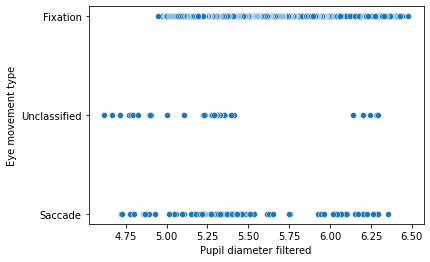

In [11]:
# Step 4: Data Visualization
# Scatter plot
sns.scatterplot(x='Pupil diameter filtered', y='Eye movement type', data=df)
plt.show()

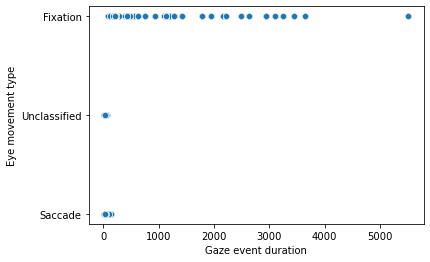

In [12]:
sns.scatterplot(x='Gaze event duration', y='Eye movement type', data=df)
plt.show()

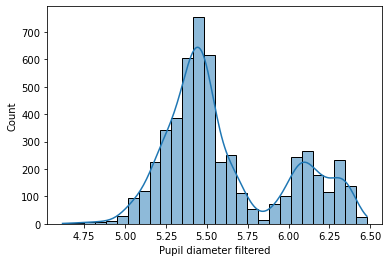

In [13]:
# Histogram for float column
sns.histplot(df['Pupil diameter filtered'], kde=True)
plt.show()

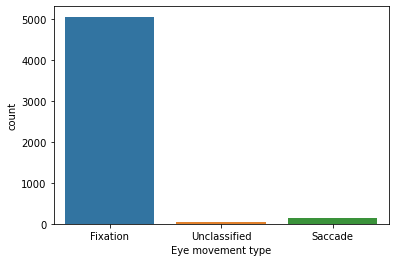

In [14]:
# Bar chart for categorical column
sns.countplot(x='Eye movement type', data=df)
plt.show()

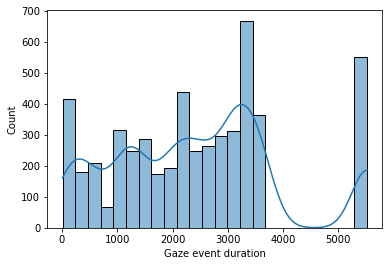

In [15]:
sns.histplot(df['Gaze event duration'], kde=True)
plt.show()


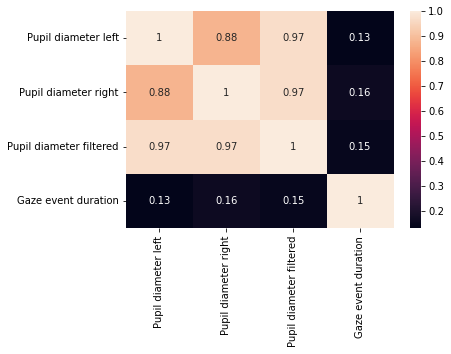

In [16]:
# Step 5: Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [17]:
# Step 6: Feature Engineering (if needed)
# For example, you can create a new feature representing the mean of the float column
df['float_mean'] = df['Pupil diameter filtered'].mean()


In [18]:
# Step 7: Model Building
# Assuming a classification task
X = df[['Pupil diameter filtered']]  # Features
y = df['Eye movement type']  # Target variable

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


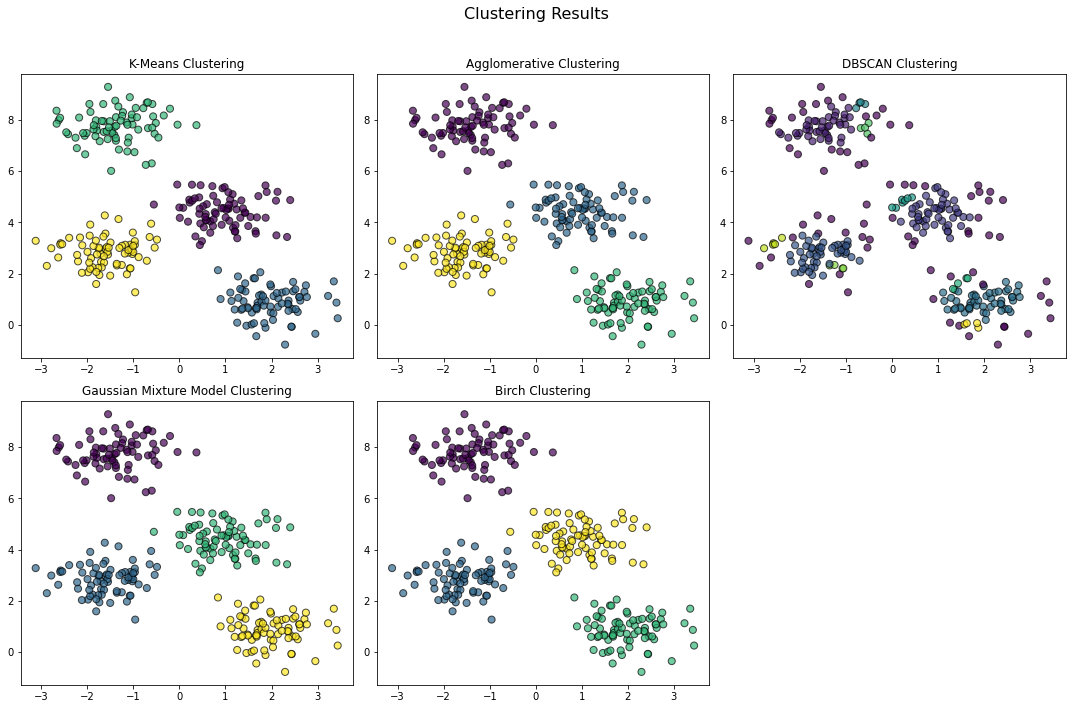

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

# Generate random data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clustering Results', fontsize=16)

# Function to visualize clustering results
def plot_clusters(ax, X, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', edgecolors='k', alpha=0.7)
    ax.set_title(title)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_pred = kmeans.fit_predict(X)
plot_clusters(axes[0, 0], X, kmeans_pred, 'K-Means Clustering')

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_pred = agg_clustering.fit_predict(X)
plot_clusters(axes[0, 1], X, agg_pred, 'Agglomerative Clustering')

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_pred = dbscan.fit_predict(X)
plot_clusters(axes[0, 2], X, dbscan_pred, 'DBSCAN Clustering')

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4)
gmm_pred = gmm.fit_predict(X)
plot_clusters(axes[1, 0], X, gmm_pred, 'Gaussian Mixture Model Clustering')

# Apply Birch clustering
birch = Birch(threshold=0.5, n_clusters=4)
birch_pred = birch.fit_predict(X)
plot_clusters(axes[1, 1], X, birch_pred, 'Birch Clustering')

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


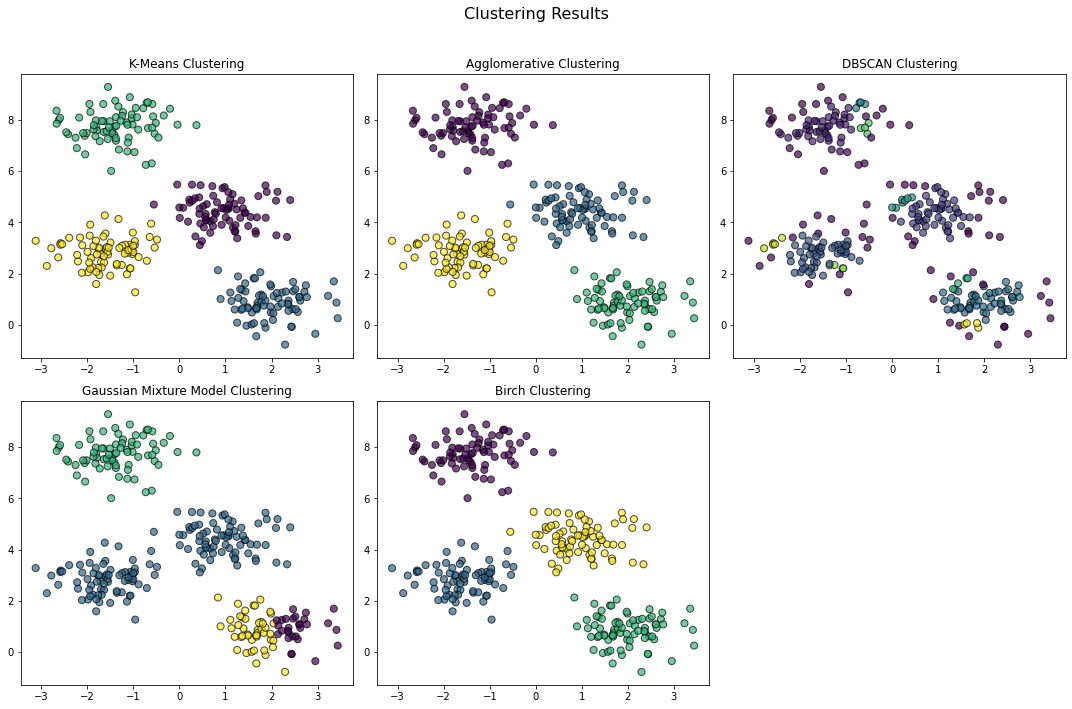

In [20]:
# now change the X value from dataset and check the error try to fix that************************************************************************
# Generate random data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clustering Results', fontsize=16)

# Function to visualize clustering results
def plot_clusters(ax, X, y_pred, title):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', edgecolors='k', alpha=0.7)
    ax.set_title(title)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_pred = kmeans.fit_predict(X)
plot_clusters(axes[0, 0], X, kmeans_pred, 'K-Means Clustering')

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_pred = agg_clustering.fit_predict(X)
plot_clusters(axes[0, 1], X, agg_pred, 'Agglomerative Clustering')

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_pred = dbscan.fit_predict(X)
plot_clusters(axes[0, 2], X, dbscan_pred, 'DBSCAN Clustering')

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4)
gmm_pred = gmm.fit_predict(X)
plot_clusters(axes[1, 0], X, gmm_pred, 'Gaussian Mixture Model Clustering')

# Apply Birch clustering
birch = Birch(threshold=0.5, n_clusters=4)
birch_pred = birch.fit_predict(X)
plot_clusters(axes[1, 1], X, birch_pred, 'Birch Clustering')

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
